# Algorithm to hire the best intern

The given data set has details of candidates who have applied for an internship

Task:
To find the best candidate for the post of an intern

Assumption:
Assuming that the internship is for data science

Solution:
Using the given data to find a score for each applicant through feature engineering

Hence the score obtained becomes the label

Finally using Machine Learning Regression models to find the best model to predict the scores

The candidate with the highest score gets selected (for the next round or is hired)

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data
data= pd.read_excel("C:\\Users\pooja\OneDrive\Desktop\Applications_for_Machine_Learning_internship_edited.xlsx")
data.head(10)

,Name,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,NaN,1.0,0.0,0.0,1.0,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021.0,NaN,6.50/7,NaN,NaN
1,NaN,2.0,0.0,0.0,0.0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024.0,NaN,8.90/10,NaN,NaN
2,NaN,2.0,2.0,0.0,0.0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022.0,NaN,NaN,NaN,NaN
3,NaN,3.0,2.0,2.0,0.0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...","Yes, I am available for 3 months starting imme...",Bachelor of Engineering (B.E),NaN,2024.0,NaN,NaN,85.60/85.60,10.00/10.00
4,NaN,2.0,2.0,0.0,0.0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023.0,NaN,8.10/10,93.40/93.40,10.00/10.00
5,NaN,2.0,2.0,0.0,2.0,"Data Analytics, Data Science, MS-Excel, R Prog...","Yes, I am available for 3 months starting imme...",BS in Data Science and Applications,Statistics,2022.0,NaN,7.09/10,NaN,NaN
6,NaN,2.0,1.0,2.0,0.0,"C++ Programming, CSS, Data Analytics, HTML, MS...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Telecommunication Engineering ...,2024.0,NaN,8.69/10,NaN,NaN
7,NaN,2.0,2.0,0.0,1.0,"Atmel AVR, Data Analytics, Data Science, MS-Ex...","Yes, I am available for 3 months starting imme...",PGP,Data Science And Machine Learning,2023.0,NaN,6.80/10,75.20/75.20,8.80/8.80
8,NaN,2.0,1.0,1.0,0.0,"C++ Programming, Data Analytics, Data Structur...","Yes, I am available for 3 months starting imme...",B.Tech,Information and Communication Technology,2023.0,NaN,7.71/10,89.90/89.90,10.00/10.00
9,NaN,2.0,2.0,0.0,1.0,"Android, Artificial Intelligence, C Programmin...","Yes, I am available for 3 months starting imme...",Bachelor of Technology (B.Tech),computer science,2025.0,8.50/10,NaN,NaN,NaN


In [3]:
# Dropping the name column as it has all null values
data=data.drop(columns=['Name'])
data.shape

(1136, 13)

The dataset has 1136 rows and 13 columns

In [4]:
# checking for missing values
data.isna().sum()

Python (out of 3)                                                                                      0
Machine Learning (out of 3)                                                                            0
Natural Language Processing (NLP) (out of 3)                                                           0
Deep Learning (out of 3)                                                                               0
Other skills                                                                                          66
Are you available for 3 months, starting immediately, for a full-time work from home internship?       0
Degree                                                                                                43
Stream                                                                                               170
Current Year Of Graduation                                                                             0
Performance_PG                                         

There is a lot of missing data

## Data Cleaning

In [5]:
#Deleting the columns Performance_PG Performance_UG Performance_12 and Performance_10 as they have more than 50%  missing values
data=data.drop(columns=['Performance_PG','Performance_UG','Performance_12','Performance_10'])
data.shape

(1136, 9)

In [6]:
#dropping rows where Degree and Stream is null as it is difficult to selsect a candidate without knowing the education background
data.dropna(subset=['Degree','Stream'], inplace=True)
data.shape

(939, 9)

In [7]:
#filling missing values in the Other skills column with stream
data['Other skills'].fillna(data['Stream'], inplace=True)
data

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation
0,1.0,0.0,0.0,1.0,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021.0
1,2.0,0.0,0.0,0.0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024.0
2,2.0,2.0,0.0,0.0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022.0
4,2.0,2.0,0.0,0.0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023.0
5,2.0,2.0,0.0,2.0,"Data Analytics, Data Science, MS-Excel, R Prog...","Yes, I am available for 3 months starting imme...",BS in Data Science and Applications,Statistics,2022.0
...,...,...,...,...,...,...,...,...,...
1131,2.0,2.0,0.0,2.0,"Data Analytics, Amazon Web Services (AWS), Dat...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021.0
1132,3.0,3.0,2.0,3.0,"Deep Learning, Docker, HTML, MS-Office, Machin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024.0
1133,3.0,1.0,3.0,3.0,"Data Science, Deep Learning, English Proficien...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025.0
1134,2.0,1.0,0.0,0.0,"Python, Data Analytics, MS-Excel, Machine Lear...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024.0


In [8]:
data.isna().sum()

Python (out of 3)                                                                                    0
Machine Learning (out of 3)                                                                          0
Natural Language Processing (NLP) (out of 3)                                                         0
Deep Learning (out of 3)                                                                             0
Other skills                                                                                         0
Are you available for 3 months, starting immediately, for a full-time work from home internship?     0
Degree                                                                                               0
Stream                                                                                               0
Current Year Of Graduation                                                                           0
dtype: int64

Now that all the missing vaules have been delt with making changes to columns

## Feature Engineering

In [9]:
data = data.reset_index(drop=True)
data

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation
0,1.0,0.0,0.0,1.0,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021.0
1,2.0,0.0,0.0,0.0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024.0
2,2.0,2.0,0.0,0.0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022.0
3,2.0,2.0,0.0,0.0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023.0
4,2.0,2.0,0.0,2.0,"Data Analytics, Data Science, MS-Excel, R Prog...","Yes, I am available for 3 months starting imme...",BS in Data Science and Applications,Statistics,2022.0
...,...,...,...,...,...,...,...,...,...
934,2.0,2.0,0.0,2.0,"Data Analytics, Amazon Web Services (AWS), Dat...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021.0
935,3.0,3.0,2.0,3.0,"Deep Learning, Docker, HTML, MS-Office, Machin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024.0
936,3.0,1.0,3.0,3.0,"Data Science, Deep Learning, English Proficien...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025.0
937,2.0,1.0,0.0,0.0,"Python, Data Analytics, MS-Excel, Machine Lear...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024.0


In [10]:
# renaming columns
data.rename(columns={'Python (out of 3)': 'Python'}, inplace=True)
data.rename(columns={'Machine Learning (out of 3)': 'Machine Learning'}, inplace=True)
data.rename(columns={data.columns[2]: 'NLP'}, inplace=True)
data.rename(columns={data.columns[3]: 'Deep Learning'}, inplace=True)
data.rename(columns={data.columns[5]: 'Availibility'}, inplace=True)
data.rename(columns={'Current Year Of Graduation': 'Graduation Year'}, inplace=True)

data

,Python,Machine Learning,NLP,Deep Learning,Other skills,Availibility,Degree,Stream,Graduation Year
0,1.0,0.0,0.0,1.0,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021.0
1,2.0,0.0,0.0,0.0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024.0
2,2.0,2.0,0.0,0.0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022.0
3,2.0,2.0,0.0,0.0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023.0
4,2.0,2.0,0.0,2.0,"Data Analytics, Data Science, MS-Excel, R Prog...","Yes, I am available for 3 months starting imme...",BS in Data Science and Applications,Statistics,2022.0
...,...,...,...,...,...,...,...,...,...
934,2.0,2.0,0.0,2.0,"Data Analytics, Amazon Web Services (AWS), Dat...","Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021.0
935,3.0,3.0,2.0,3.0,"Deep Learning, Docker, HTML, MS-Office, Machin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024.0
936,3.0,1.0,3.0,3.0,"Data Science, Deep Learning, English Proficien...","Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025.0
937,2.0,1.0,0.0,0.0,"Python, Data Analytics, MS-Excel, Machine Lear...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024.0


In the following step we will count the number of skills of each candidate 

We will then score the skills out of 10:
1 point for each skill and if there are more than 10 skills the score will remain 10

In [11]:
data['Other skills']=data['Other skills'].str.split(',')
data['Other skills']

0      [MS-Excel,  MS-Word,  Deep Learning,  MySQL,  ...
1      [Git,  GitHub,  Linux,  Adobe After Effects,  ...
2      [Amazon Web Services (AWS),  Docker,  Hadoop, ...
3      [C++ Programming,  Data Science,  Machine Lear...
4      [Data Analytics,  Data Science,  MS-Excel,  R ...
                             ...                        
934    [Data Analytics,  Amazon Web Services (AWS),  ...
935    [Deep Learning,  Docker,  HTML,  MS-Office,  M...
936    [Data Science,  Deep Learning,  English Profic...
937    [Python,  Data Analytics,  MS-Excel,  Machine ...
938    [C++ Programming,  Database Management System ...
Name: Other skills, Length: 939, dtype: object

In [12]:
skill_count=[]
for i in data['Other skills']:
    x= len(i)
    skill_count.append (x)
skill_count

[6,
 33,
 8,
 4,
 10,
 11,
 11,
 13,
 18,
 6,
 11,
 7,
 5,
 12,
 28,
 1,
 6,
 5,
 7,
 11,
 8,
 30,
 4,
 10,
 7,
 16,
 12,
 9,
 22,
 11,
 23,
 7,
 3,
 12,
 7,
 9,
 10,
 8,
 27,
 7,
 25,
 11,
 3,
 11,
 10,
 9,
 9,
 5,
 12,
 14,
 7,
 5,
 1,
 12,
 17,
 7,
 2,
 6,
 5,
 4,
 61,
 3,
 4,
 2,
 27,
 11,
 6,
 6,
 8,
 7,
 5,
 14,
 10,
 16,
 18,
 3,
 5,
 1,
 6,
 13,
 10,
 11,
 3,
 5,
 6,
 19,
 9,
 21,
 33,
 12,
 13,
 3,
 5,
 14,
 25,
 14,
 6,
 5,
 9,
 14,
 8,
 7,
 14,
 7,
 6,
 16,
 17,
 8,
 18,
 4,
 4,
 14,
 5,
 12,
 7,
 6,
 10,
 9,
 13,
 9,
 18,
 15,
 5,
 13,
 3,
 30,
 1,
 32,
 2,
 1,
 9,
 4,
 1,
 6,
 1,
 7,
 31,
 10,
 10,
 1,
 7,
 27,
 9,
 10,
 19,
 6,
 7,
 13,
 6,
 5,
 13,
 26,
 6,
 6,
 12,
 27,
 12,
 22,
 10,
 5,
 1,
 7,
 7,
 11,
 9,
 8,
 12,
 7,
 4,
 4,
 12,
 16,
 9,
 18,
 6,
 8,
 20,
 3,
 10,
 7,
 5,
 6,
 8,
 9,
 7,
 10,
 14,
 13,
 8,
 12,
 11,
 19,
 20,
 7,
 8,
 14,
 7,
 3,
 15,
 10,
 7,
 15,
 7,
 3,
 10,
 26,
 7,
 20,
 8,
 12,
 9,
 6,
 21,
 10,
 8,
 8,
 9,
 19,
 1,
 3,
 1,
 1,
 19,
 7,
 1,


In [13]:
skill=[]
for i in skill_count:
    if i>=10:
        skill.append(10)
    else:
        skill.append(i)
skill

[6,
 10,
 8,
 4,
 10,
 10,
 10,
 10,
 10,
 6,
 10,
 7,
 5,
 10,
 10,
 1,
 6,
 5,
 7,
 10,
 8,
 10,
 4,
 10,
 7,
 10,
 10,
 9,
 10,
 10,
 10,
 7,
 3,
 10,
 7,
 9,
 10,
 8,
 10,
 7,
 10,
 10,
 3,
 10,
 10,
 9,
 9,
 5,
 10,
 10,
 7,
 5,
 1,
 10,
 10,
 7,
 2,
 6,
 5,
 4,
 10,
 3,
 4,
 2,
 10,
 10,
 6,
 6,
 8,
 7,
 5,
 10,
 10,
 10,
 10,
 3,
 5,
 1,
 6,
 10,
 10,
 10,
 3,
 5,
 6,
 10,
 9,
 10,
 10,
 10,
 10,
 3,
 5,
 10,
 10,
 10,
 6,
 5,
 9,
 10,
 8,
 7,
 10,
 7,
 6,
 10,
 10,
 8,
 10,
 4,
 4,
 10,
 5,
 10,
 7,
 6,
 10,
 9,
 10,
 9,
 10,
 10,
 5,
 10,
 3,
 10,
 1,
 10,
 2,
 1,
 9,
 4,
 1,
 6,
 1,
 7,
 10,
 10,
 10,
 1,
 7,
 10,
 9,
 10,
 10,
 6,
 7,
 10,
 6,
 5,
 10,
 10,
 6,
 6,
 10,
 10,
 10,
 10,
 10,
 5,
 1,
 7,
 7,
 10,
 9,
 8,
 10,
 7,
 4,
 4,
 10,
 10,
 9,
 10,
 6,
 8,
 10,
 3,
 10,
 7,
 5,
 6,
 8,
 9,
 7,
 10,
 10,
 10,
 8,
 10,
 10,
 10,
 10,
 7,
 8,
 10,
 7,
 3,
 10,
 10,
 7,
 10,
 7,
 3,
 10,
 10,
 7,
 10,
 8,
 10,
 9,
 6,
 10,
 10,
 8,
 8,
 9,
 10,
 1,
 3,
 1,
 1,
 10,
 7,
 1,


In [14]:
data['skill_count'] = skill
data=data.drop(columns=['Other skills'])
data


,Python,Machine Learning,NLP,Deep Learning,Availibility,Degree,Stream,Graduation Year,skill_count
0,1.0,0.0,0.0,1.0,"Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021.0,6
1,2.0,0.0,0.0,0.0,"Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024.0,10
2,2.0,2.0,0.0,0.0,"Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022.0,8
3,2.0,2.0,0.0,0.0,"Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023.0,4
4,2.0,2.0,0.0,2.0,"Yes, I am available for 3 months starting imme...",BS in Data Science and Applications,Statistics,2022.0,10
...,...,...,...,...,...,...,...,...,...
934,2.0,2.0,0.0,2.0,"Yes, I am available for 3 months starting imme...",B.Tech,Mechanical Engineering,2021.0,8
935,3.0,3.0,2.0,3.0,"Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024.0,10
936,3.0,1.0,3.0,3.0,"Yes, I am available for 3 months starting imme...",B.Tech,Electronics and Communication,2025.0,10
937,2.0,1.0,0.0,0.0,"Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2024.0,4


For the 'Availibility' column we will only consider if the applicant is available or not ie., Yes or No

In [15]:
data['Availibility']=data['Availibility'].str.split(',')

In [16]:
Available=[]
for i in range(0,939):
    Available.append(data['Availibility'][i][0])
    
Available

['Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 'Yes',
 '

In [17]:
data=data.drop(columns=['Availibility'])
data['Availibility'] = Available
data

,Python,Machine Learning,NLP,Deep Learning,Degree,Stream,Graduation Year,skill_count,Availibility
0,1.0,0.0,0.0,1.0,Bachelor of Vocation (B.Voc.),Software Engineering,2021.0,6,Yes
1,2.0,0.0,0.0,0.0,B.Tech,Computer Science & Engineering,2024.0,10,Yes
2,2.0,2.0,0.0,0.0,Master of Science (M.S.),Data Science And Analytics,2022.0,8,Yes
3,2.0,2.0,0.0,0.0,B.Tech,Computer Science,2023.0,4,Yes
4,2.0,2.0,0.0,2.0,BS in Data Science and Applications,Statistics,2022.0,10,Yes
...,...,...,...,...,...,...,...,...,...
934,2.0,2.0,0.0,2.0,B.Tech,Mechanical Engineering,2021.0,8,Yes
935,3.0,3.0,2.0,3.0,B.Tech,Computer Science & Engineering,2024.0,10,Yes
936,3.0,1.0,3.0,3.0,B.Tech,Electronics and Communication,2025.0,10,Yes
937,2.0,1.0,0.0,0.0,B.Tech,Computer Science,2024.0,4,Yes


We will only consider candidates who have recently passed out or who will be graduating in the near future

Hence applicants whose graduation years are between 2021 and 2025 will be scored 1 others will be scored 0 

In [18]:
data['Graduation Year'].unique()

array([2021., 2024., 2022., 2023., 2025., 2019., 2012., 2020., 2014.,
       2027., 2026., 2017., 2006., 2016., 2018., 2004., 2013., 2010.,
       2015., 2008., 2011.])

In [19]:
Graduate=[]
for i in data['Graduation Year']:
    if i in range(2021,2025):
        Graduate.append(1)
    else:
        Graduate.append(0)

Graduate

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [20]:
data=data.drop(columns=['Graduation Year'])
data['Graduate']=Graduate
data['Graduate'].unique()

array([1, 0], dtype=int64)

The column 'Degree' will be converted to numerical values or scores as follows:

Data Science :3

others:

Masters/PG :2.5

Engineering :2

Bachelor's :1

In [21]:
data['Degree'].unique()

array(['Bachelor of Vocation (B.Voc.)', 'B.Tech',
       'Master of Science (M.S.)', 'BS in Data Science and Applications',
       'PGP', 'Bachelor of Technology (B.Tech)', 'MBA',
       'Bachelor of Commerce (B.Com)', 'Bachelor of Engineering (B.E)',
       'Master of Computer Applications (MCA)',
       'Post Graduate Diploma in Management (P.G.D.M.)',
       'M.Sc. in Data Science', 'B.Tech (Hons.)',
       'Master of Technology (M.Tech)', 'Integrated M.Sc.',
       'Bachelor of Science (B.Sc)', 'BE',
       'Bachelor of Computer Applications (BCA)',
       'Master of Science (M.Sc)',
       'B.E Computer Science and Engineering (Artificial Intelligence and machine Learning)',
       'Post Graduate Programme (PGP)', 'Ms In Data Science',
       'ITI Electrical Engineering', 'M.Sc (Information Technology)',
       'Post Graduate Diploma', 'Bachelor of Arts (B.A.)',
       'Advanced Certification In Data Science', 'Btech',
       'Post Graduate Diploma In Computer Applications (P.G.D.

In [22]:
# Iterate over the column values

for i in range(len(data['Degree'])):
    if "Data" in data['Degree'][i]:
        data['Degree'][i] = data['Degree'][i].replace(data['Degree'][i], "3") # Data Science
    elif "Bachelor" in data['Degree'][i]:
        data['Degree'][i] = data['Degree'][i].replace(data['Degree'][i], "1") # Bachelors Degree
    elif "Engineering" in data['Degree'][i]:
        data['Degree'][i] = data['Degree'][i].replace(data['Degree'][i], "2") # Engineering
    elif "BE" in data['Degree'][i]:
        data['Degree'][i] = data['Degree'][i].replace(data['Degree'][i], "2")
    elif "B.Tech" in data['Degree'][i]:
        data['Degree'][i] = data['Degree'][i].replace(data['Degree'][i], "2")
    elif "Master" in data['Degree'][i]:
        data['Degree'][i] = data['Degree'][i].replace(data['Degree'][i], "2.5")# Post Grad / Master
    elif "PG" in data['Degree'][i]:
        data['Degree'][i] = data['Degree'][i].replace(data['Degree'][i], "2.5")
    else:
        data['Degree'][i] = data['Degree'][i].replace(data['Degree'][i], "0") # Others
        
    
        



In [23]:
data['Degree'].unique()

array(['1', '2', '2.5', '3', '0'], dtype=object)

In [24]:
data['Degree']= data['Degree'].astype(float)

The column 'Stream' will be converted to numerical values or scores as follows:

Data Science/ Machine Learning/ AI :3

others:

Computer related :2.5

Engineering :2

Others :1

In [25]:
data['Stream'].unique()

array(['Software Engineering', 'Computer Science & Engineering',
       'Data Science And Analytics', 'Computer Science', 'Statistics',
       'Electronics and Telecommunication Engineering (ETE)',
       'Data Science And Machine Learning',
       'Information and Communication Technology', 'computer science',
       'Analytics And Finance', 'Information Technology', 'Commerce',
       'Instrumentation and Control Engineering',
       'Electronics and Communication',
       'Electrical and Electronics Engineering', 'Computer Applications',
       'Data Science And Business Analytics', 'Data Science', 'Finance',
       'Networks And Communication',
       'Statistics Computing( DATA Science )',
       'Computer  Science And Engineering', 'AIML',
       'Metallurgical And Materials Engineering',
       'Electronics Engineering', 'CSE Hons DS&AI', 'Physics',
       'Computer Sciences &Engineering', 'Computational Data Science',
       'Computer Application', 'Python,sql', 'Mechanical Eng

In [26]:
# Iterate over the column values
for i in range(len(data['Stream'])):
    if "Data" in data['Stream'][i]:
        data['Stream'][i] = data['Stream'][i].replace(data['Stream'][i], "3") # Data Science
    elif "Machine Learning" in data['Stream'][i]:
        data['Stream'][i] = data['Stream'][i].replace(data['Stream'][i], "3")
    elif "AI" in data['Stream'][i]:
        data['Stream'][i] = data['Stream'][i].replace(data['Stream'][i], "3")
    elif "Engineering" in data['Stream'][i]:
        data['Stream'][i] = data['Stream'][i].replace(data['Stream'][i], "2") # Engineering
    elif "Computer" in data['Stream'][i]:
        data['Stream'][i] = data['Stream'][i].replace(data['Stream'][i], "2.5") # Related
    else:
        data['Stream'][i] = data['Stream'][i].replace(data['Stream'][i], "1") # Others
        

In [27]:
data['Stream'].unique()


array(['2', '3', '2.5', '1'], dtype=object)

In [28]:
data['Stream']= data['Stream'].astype(float)

Now that the columns have are transformed

Looking at the dataset

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Python            939 non-null    float64
 1   Machine Learning  939 non-null    float64
 2   NLP               939 non-null    float64
 3   Deep Learning     939 non-null    float64
 4   Degree            939 non-null    float64
 5   Stream            939 non-null    float64
 6   skill_count       939 non-null    int64  
 7   Availibility      939 non-null    object 
 8   Graduate          939 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 66.1+ KB


In [30]:
data.nunique()

Python               4
Machine Learning     4
NLP                  4
Deep Learning        4
Degree               5
Stream               4
skill_count         10
Availibility         2
Graduate             2
dtype: int64

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Python,939.0,1.853035,0.891633,0.0,2.0,2.0,2.0,3.0
Machine Learning,939.0,1.347178,1.018392,0.0,0.0,2.0,2.0,3.0
NLP,939.0,0.519702,0.881210,0.0,0.0,0.0,1.0,3.0
Deep Learning,939.0,0.696486,0.952216,0.0,0.0,0.0,2.0,3.0
Degree,939.0,1.602769,0.728884,0.0,1.0,2.0,2.0,3.0
Stream,939.0,1.884984,0.729063,1.0,1.0,2.0,2.5,3.0
skill_count,939.0,7.777423,2.795916,1.0,6.0,9.0,10.0,10.0
Graduate,939.0,0.761448,0.426425,0.0,1.0,1.0,1.0,1.0


The datset now has no null values

All the columns are encoded except 'Availibility'

In [32]:
#Encoding careorical data:
L_encoder = LabelEncoder()
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=L_encoder.fit_transform(data[i].values.reshape(-1,1))

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Python            939 non-null    float64
 1   Machine Learning  939 non-null    float64
 2   NLP               939 non-null    float64
 3   Deep Learning     939 non-null    float64
 4   Degree            939 non-null    float64
 5   Stream            939 non-null    float64
 6   skill_count       939 non-null    int64  
 7   Availibility      939 non-null    int32  
 8   Graduate          939 non-null    int64  
dtypes: float64(6), int32(1), int64(2)
memory usage: 62.5 KB


Now that we have our features let's create the label column

Label name: score = sum of all features

In [34]:
data['score']=data.sum(axis=1)
data

,Python,Machine Learning,NLP,Deep Learning,Degree,Stream,skill_count,Availibility,Graduate,score
0,1.0,0.0,0.0,1.0,1.0,2.0,6,1,1,13.0
1,2.0,0.0,0.0,0.0,2.0,2.0,10,1,1,18.0
2,2.0,2.0,0.0,0.0,2.5,3.0,8,1,1,19.5
3,2.0,2.0,0.0,0.0,2.0,2.5,4,1,1,14.5
4,2.0,2.0,0.0,2.0,3.0,1.0,10,1,1,22.0
...,...,...,...,...,...,...,...,...,...,...
934,2.0,2.0,0.0,2.0,2.0,2.0,8,1,1,20.0
935,3.0,3.0,2.0,3.0,2.0,2.0,10,1,1,27.0
936,3.0,1.0,3.0,3.0,2.0,1.0,10,1,0,24.0
937,2.0,1.0,0.0,0.0,2.0,2.5,4,1,1,13.5


## Data Visualisation

<function matplotlib.pyplot.show(close=None, block=None)>

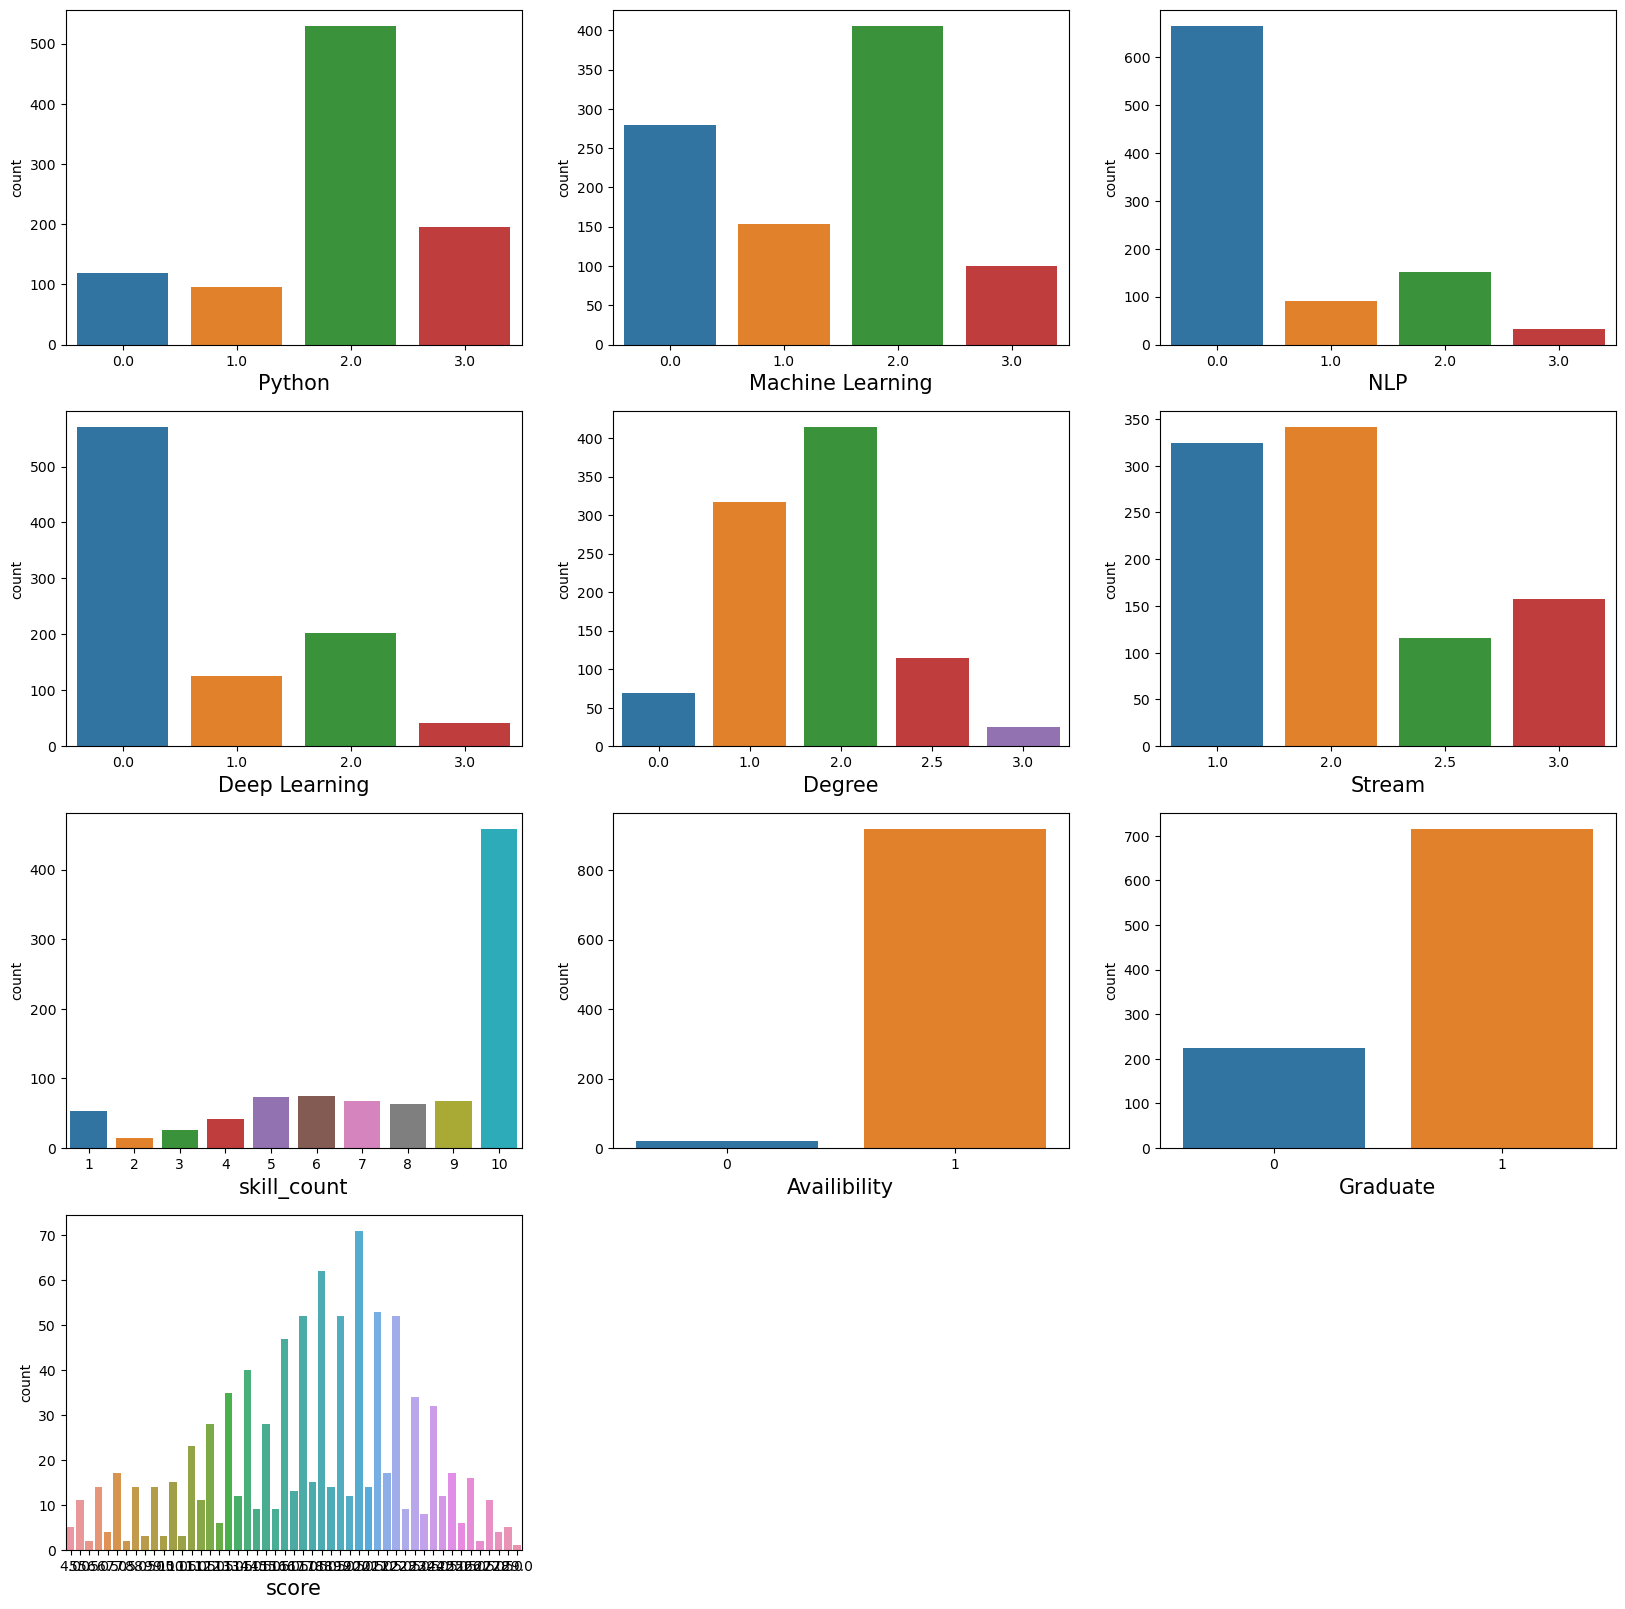

In [35]:
#Univariate Analysis

plt.figure(figsize=(20,20))
plotnumber = 1
for column in data:
    if plotnumber <=10:
        ax= plt.subplot(4,3,plotnumber)
        sns.countplot(data=data,x=data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

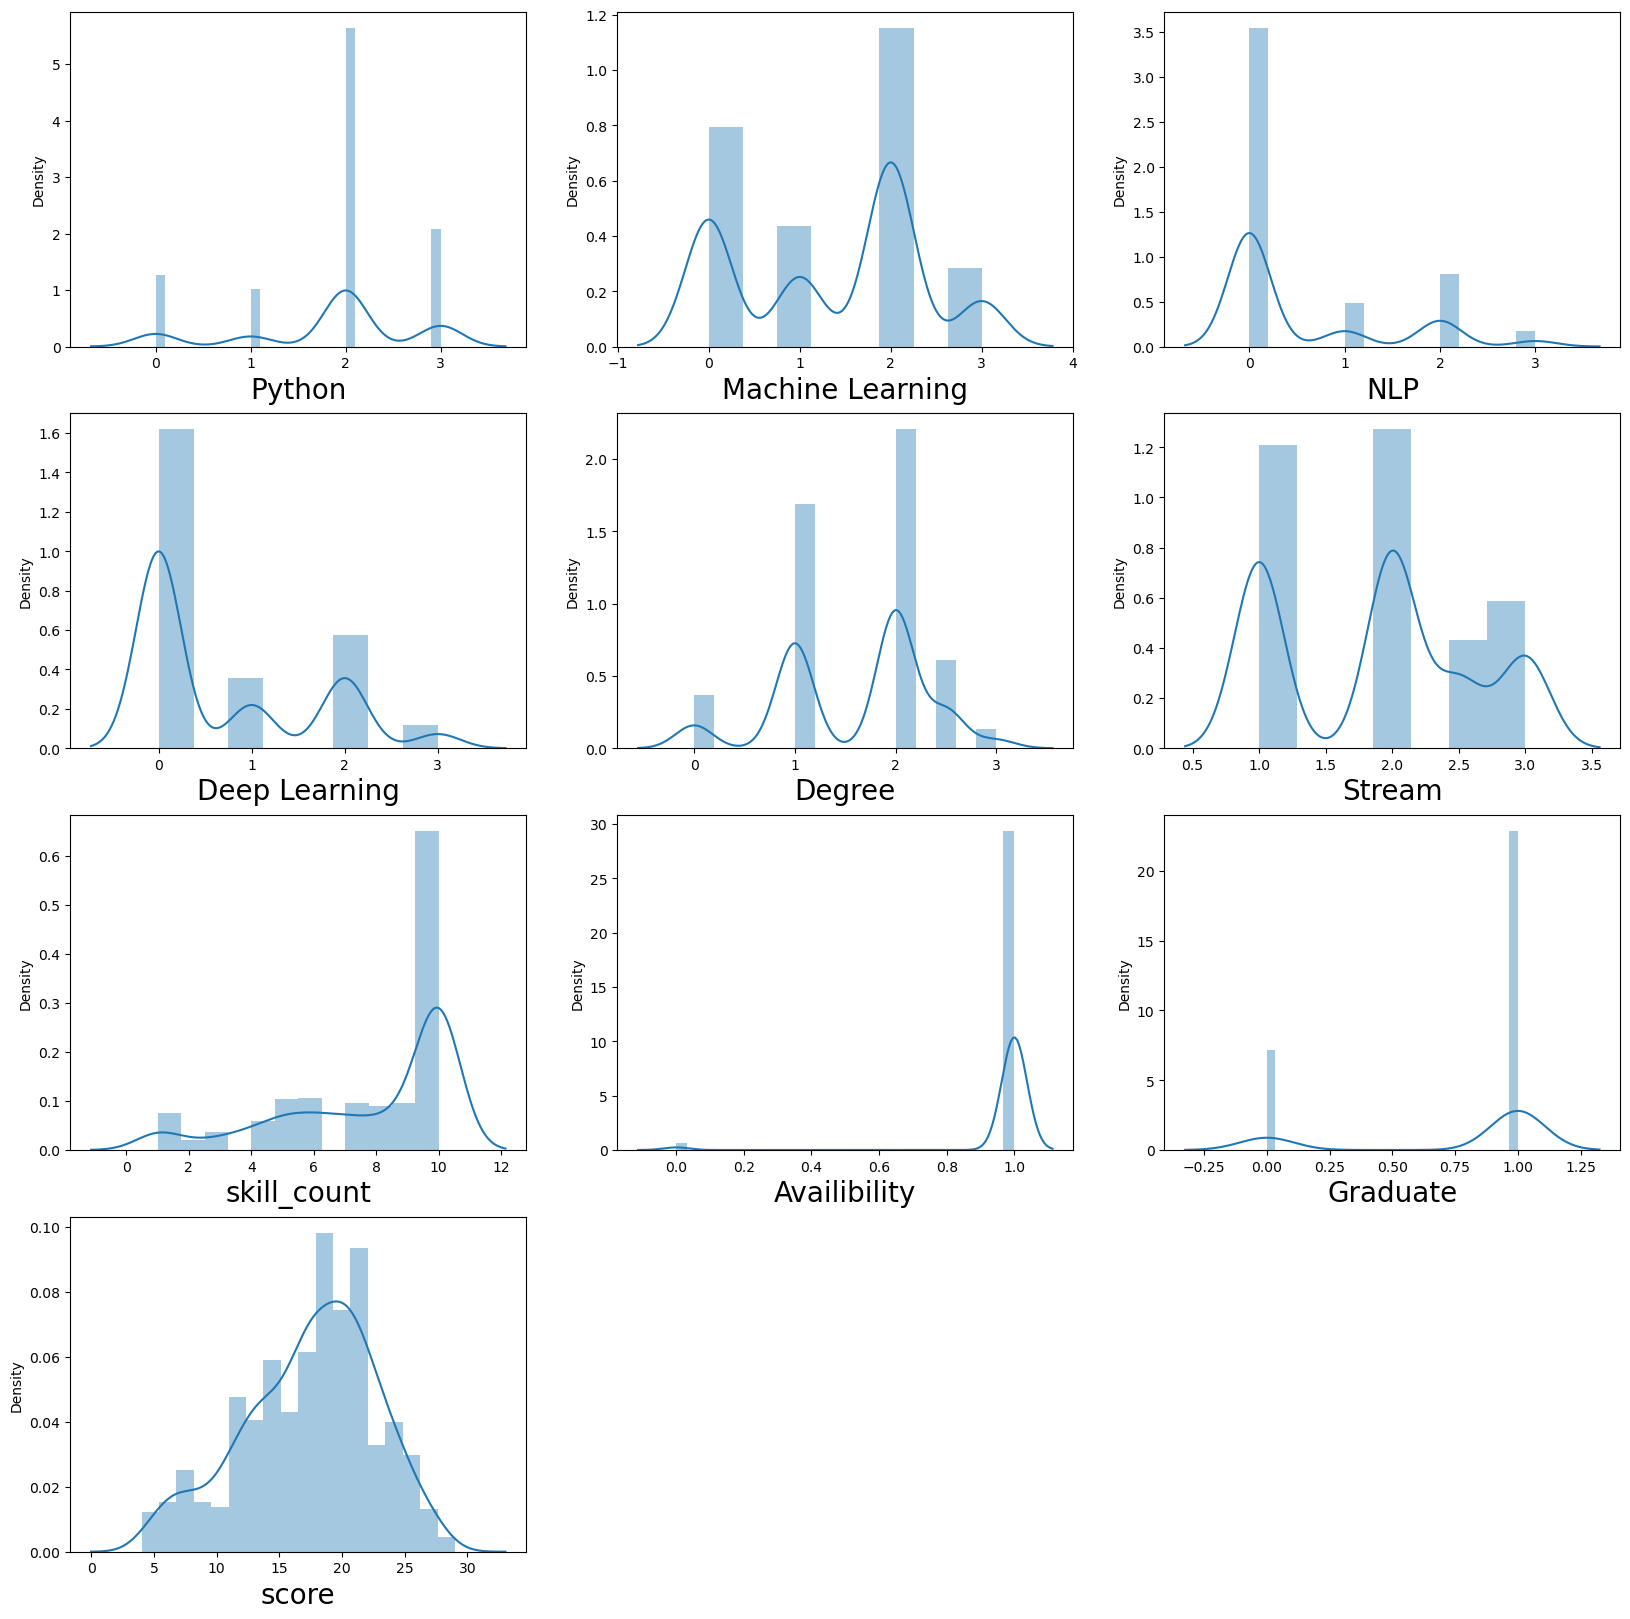

In [36]:
plt.figure(figsize=(20,20))
plotnumber = 1
for column in data:
    if plotnumber <=10:
        ax= plt.subplot(4,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

The dataset looks good

Though all our features are categories we will have a look at outliers

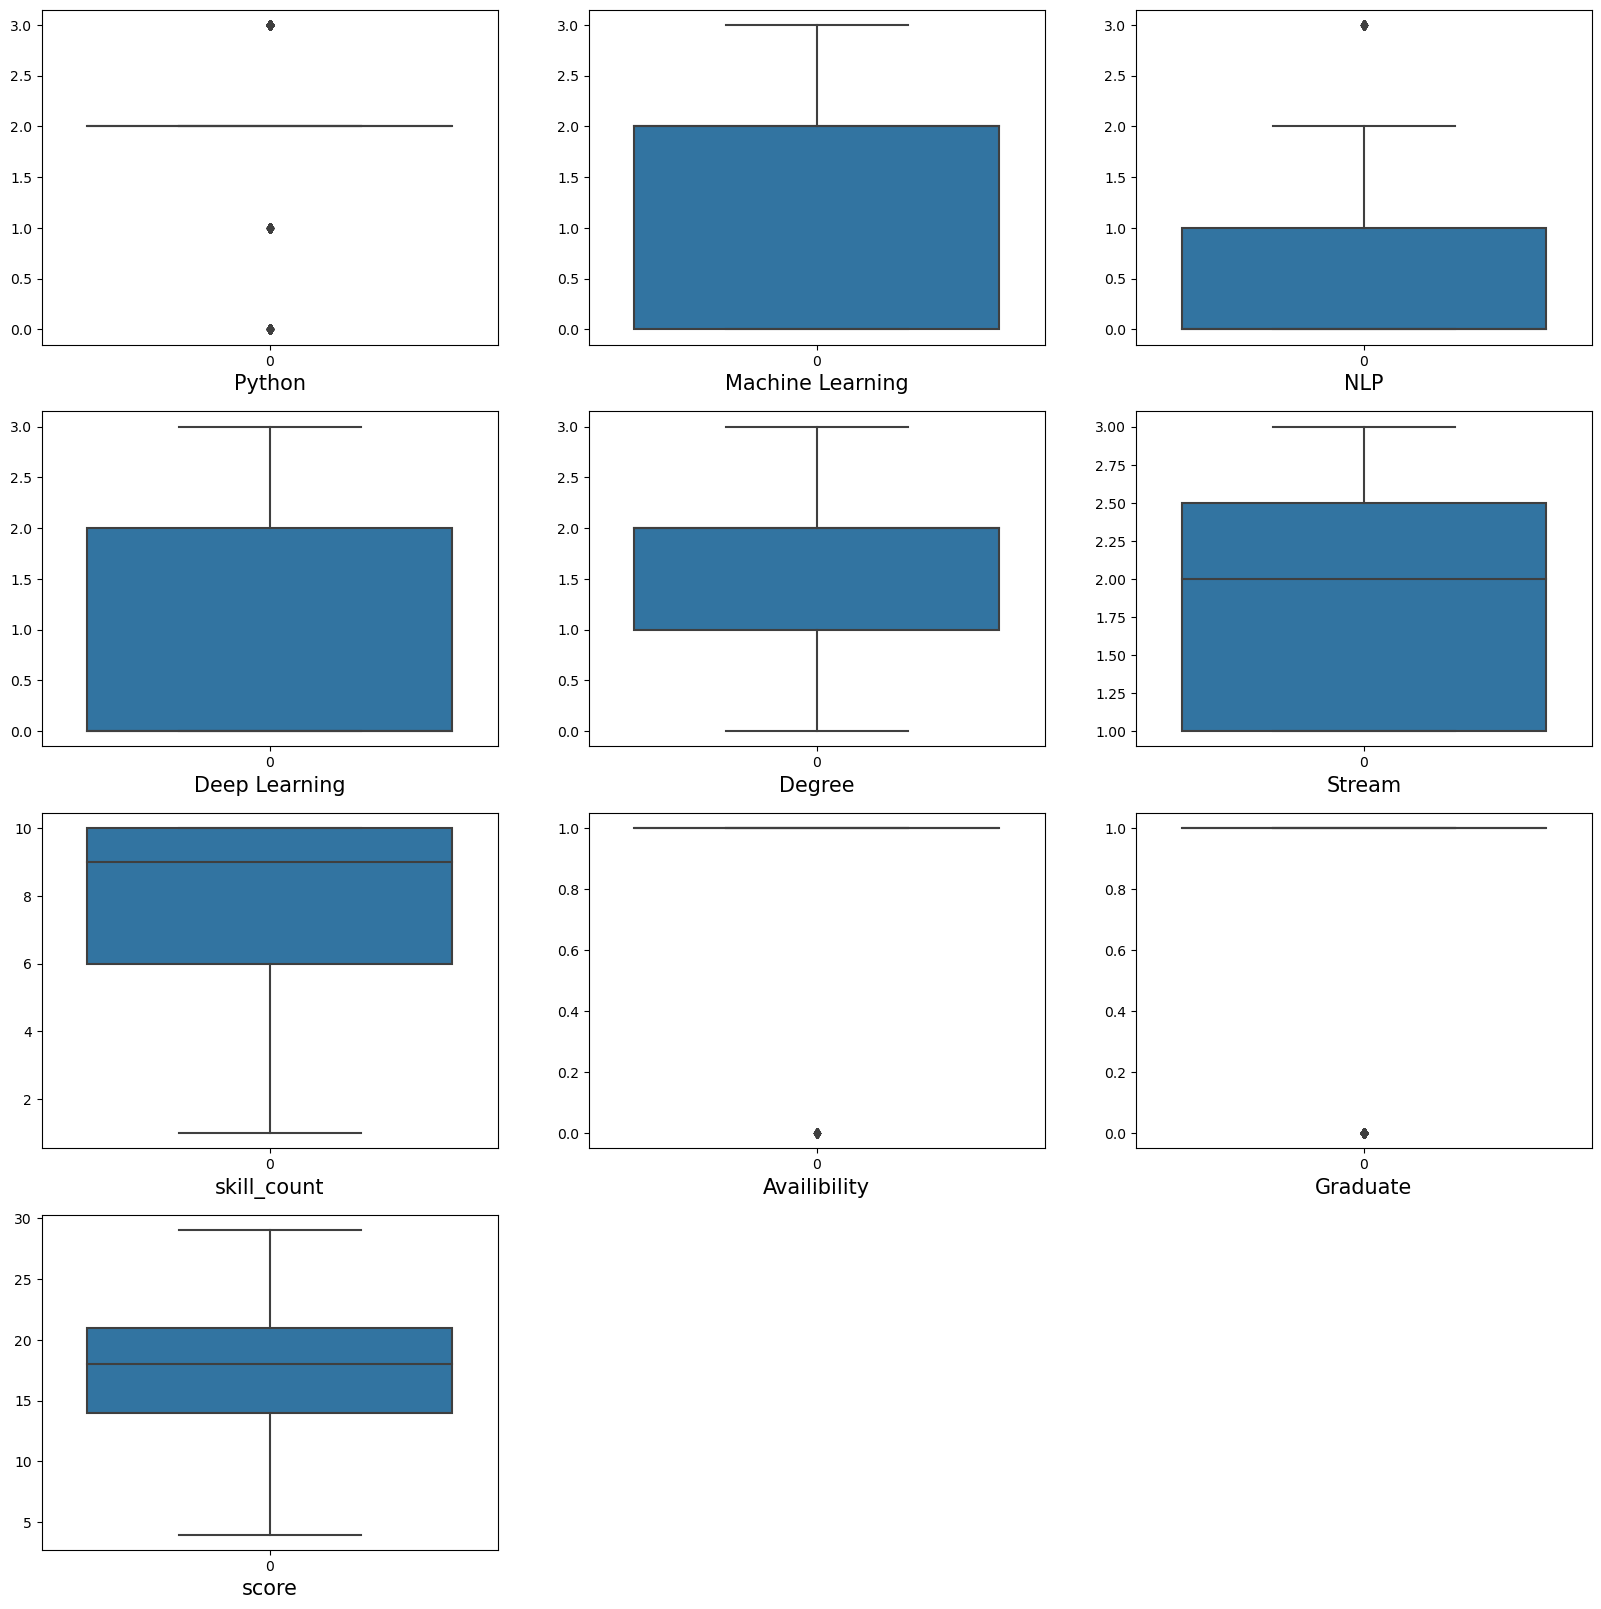

In [37]:
# Visualising outliers using box plot
plt.figure(figsize=(20,20))
graph =1
for column in data:
    if graph <=10:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

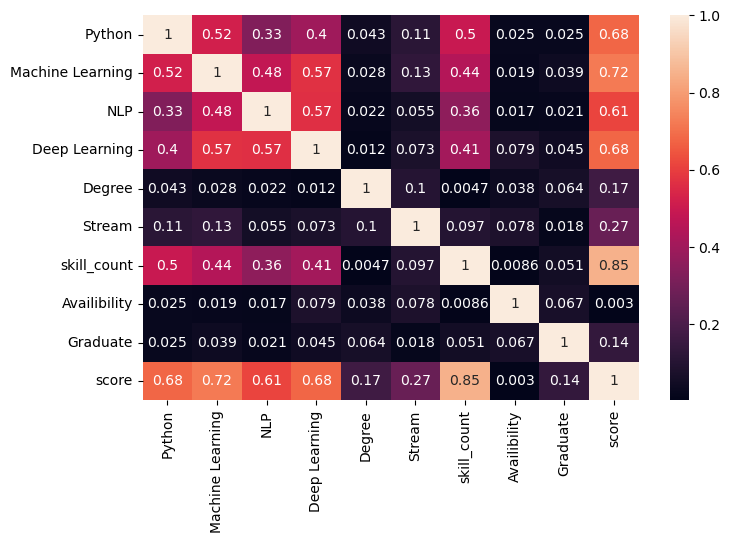

In [38]:
## Plotting heat map to check for multicollinerity and labelv//s feature relationship
df_corr = data.corr().abs()
plt.figure(figsize=(8,5))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

From the heat map we observe:

Features have strong realtion with the label

There is not very high correlation among the features which is good and rules our multicollinearity

## Model Building and Selection

In [39]:
#Dividing data into features and label

X = data.drop(columns=['score'])
Y= data['score']

In [40]:
# Using Standard Scaler to Scale the data
scaler = StandardScaler()

X_scaled =  pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

,Python,Machine Learning,NLP,Deep Learning,Degree,Stream,skill_count,Availibility,Graduate
0,-0.957221,-1.323553,-0.590074,0.318915,-0.827416,0.157843,-0.636060,0.151248,0.559720
1,0.164914,-1.323553,-0.590074,-0.731827,0.545276,0.157843,0.795361,0.151248,0.559720
2,0.164914,0.641374,-0.590074,-0.731827,1.231622,1.530197,0.079650,0.151248,0.559720
3,0.164914,0.641374,-0.590074,-0.731827,0.545276,0.844020,-1.351770,0.151248,0.559720
4,0.164914,0.641374,-0.590074,1.369657,1.917968,-1.214511,0.795361,0.151248,0.559720
...,...,...,...,...,...,...,...,...,...
934,0.164914,0.641374,-0.590074,1.369657,0.545276,0.157843,0.079650,0.151248,0.559720
935,1.287050,1.623838,1.680743,2.420399,0.545276,0.157843,0.795361,0.151248,0.559720
936,1.287050,-0.341090,2.816152,2.420399,0.545276,-1.214511,0.795361,0.151248,-1.786607
937,0.164914,-0.341090,-0.590074,-0.731827,0.545276,0.844020,-1.351770,0.151248,0.559720


In [41]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,1.582246,Python
1,1.854281,Machine Learning
2,1.581203,NLP
3,1.836215,Deep Learning
4,1.018929,Degree
5,1.036260,Stream
6,1.481147,skill_count
7,1.021718,Availibility
8,1.018489,Graduate


Since all vifs are less than 5 we can proceed without worring about multicollinearity 

In [42]:
#traintestsplit
lr = LinearRegression()
for i in range(500,800):
    x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.25, random_state = i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100)==round(r2_score(y_test,pred_test)*100):
        print ("At random state ",i,"the model performs well")
        print ("Acuraccy of training model :",r2_score(y_train,pred_train)*100)
        print ("Accuracy of testing model :",r2_score(y_test,pred_test)*100)
        print ("\n-----------------------------------------\n")

At random state  500 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  501 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  502 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  503 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  504 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  505 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  506 the model performs well
Acuracc

At random state  594 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  595 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  596 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  597 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  598 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  599 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  600 the model performs well
Acuracc

Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  660 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  661 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  662 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  663 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  664 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  665 the model performs well
Acuraccy of training model : 100.0
Accuracy of testi

At random state  713 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  714 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  715 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  716 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  717 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  718 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  719 the model performs well
Acuracc

At random state  780 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  781 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  782 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  783 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  784 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  785 the model performs well
Acuraccy of training model : 100.0
Accuracy of testing model : 100.0

-----------------------------------------

At random state  786 the model performs well
Acuracc

In [43]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.25, random_state = 560)

In [44]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    mse = mean_squared_error(y_test,pred_test)
    
    print (algorithm)
    print ("Acuraccy of training model :",r2_score(y_train,pred_train))
    print ("Accuracy of testing model :",r2_score(y_test,pred_test))
    print ("RMSE : ",sqrt(mse))
    print ("\n-----------------------------------------\n")

In [45]:
#Training Model
#Linear Regression
lr= LinearRegression()
model_selection(lr,x_train,y_train,x_test,y_test)

reg=Ridge()
model_selection(reg,x_train,y_train,x_test,y_test)

lasso=Lasso()
model_selection(lasso,x_train,y_train,x_test,y_test)


#Decision Tree
dtr = DecisionTreeRegressor()
model_selection(dtr,x_train,y_train,x_test,y_test)

#Random Forest 
rf= RandomForestRegressor()
model_selection(rf,x_train,y_train,x_test,y_test)

#Support Vector Regressor:
svr = SVR()
model_selection(svr,x_train,y_train,x_test,y_test)

#AdaBoost
ada = AdaBoostRegressor()
model_selection(ada,x_train,y_train,x_test,y_test)

#XGBoost
xg = xgb.XGBRegressor()
model_selection(xg,x_train,y_train,x_test,y_test)



LinearRegression()
Acuraccy of training model : 1.0
Accuracy of testing model : 1.0
RMSE :  2.828911826011634e-15

-----------------------------------------

Ridge()
Acuraccy of training model : 0.9999992906878468
Accuracy of testing model : 0.9999992077194297
RMSE :  0.0048893372775237415

-----------------------------------------

Lasso()
Acuraccy of training model : 0.8793714721657989
Accuracy of testing model : 0.8864632983759476
RMSE :  1.8508815692204246

-----------------------------------------

DecisionTreeRegressor()
Acuraccy of training model : 1.0
Accuracy of testing model : 0.9599475128779789
RMSE :  1.0993228089591667

-----------------------------------------

RandomForestRegressor()
Acuraccy of training model : 0.9973805704677379
Accuracy of testing model : 0.9885262740174643
RMSE :  0.5883865425077763

-----------------------------------------

SVR()
Acuraccy of training model : 0.977906362698033
Accuracy of testing model : 0.9721932457298269
RMSE :  0.9159792671092792

In [46]:
# Hyperparameter Tunning:
#SVR:
parameters = {'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001]
             }

clf = GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print ("SVR: \n",clf.best_params_)

#AdaBoost:
parameters = { 'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0]
             }

clf = GridSearchCV(ada,parameters)
clf.fit(x_train,y_train)
print ("Adaboost: \n",clf.best_params_)



SVR: 
 {'C': 1, 'epsilon': 0.001, 'kernel': 'linear'}
Adaboost: 
 {'learning_rate': 1.0, 'n_estimators': 200}


In [47]:
#Support Vector Regressor:
svr1 = SVR(C= 1, epsilon=0.001, kernel='linear')
model_selection(svr,x_train,y_train,x_test,y_test)

#AdaBoost
ada1 = AdaBoostRegressor(learning_rate = 1.0, n_estimators = 200)
model_selection(ada,x_train,y_train,x_test,y_test)

SVR()
Acuraccy of training model : 0.977906362698033
Accuracy of testing model : 0.9721932457298269
RMSE :  0.9159792671092792

-----------------------------------------

AdaBoostRegressor()
Acuraccy of training model : 0.9542606208022132
Accuracy of testing model : 0.954824369785689
RMSE :  1.1675153631025108

-----------------------------------------



Selecting SVR for our prediction 

In [48]:
# Saving Model
import pickle
filename= 'hire_best.pkl'
pickle.dump(svr,open(filename, 'wb'))

In [49]:
#Final Prediction
a= np.array(y_test)
predicted=np.array (svr.predict(x_test))

df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,16.0,16.168950
1,20.0,19.885970
2,25.0,24.674305
3,13.0,13.447408
4,22.5,22.518258
...,...,...
230,18.0,18.002170
231,22.0,22.099958
232,20.0,20.099624
233,17.5,17.400242


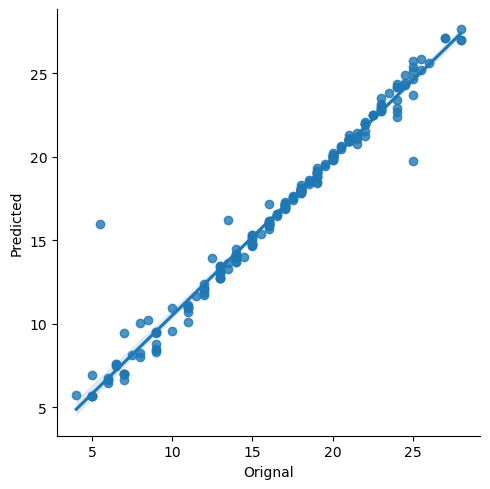

In [50]:
sns.lmplot(x='Orignal',y='Predicted',data=df)

From the above graph we can say that the predicted values a very close to the actual values

Hence our model is a good model

According to me the above algorithm is a simple but a good one

## Thank you